In [77]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=1
N=4

In [78]:
# Structral connectivity matrix

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

In [79]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [80]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0
print(J)

[[0.         0.         0.03013607 0.        ]
 [0.         0.         0.         0.02983979]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [81]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[0.29234428 0.36107717 1.15762974 2.82607979]


In [82]:
gamma_term1=0
gamma_term2=0
for z in r_pattern[0]:
    gamma_term1=gamma_term1+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(f(phi(z))**2)
for z in r_pattern[0]:
    gamma_term2=gamma_term2+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(g(phi(z))**2)
gamma=A**2*gamma_term1*gamma_term2
print(gamma)

2.124423088757611e-07


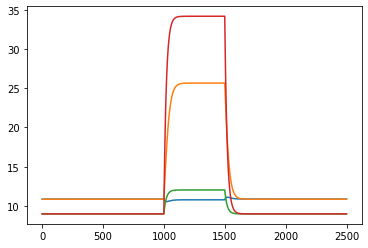

In [83]:
#Novel stimulus
t_p=150
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
alpha=p/N/c
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0

for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
for i in range(N):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])

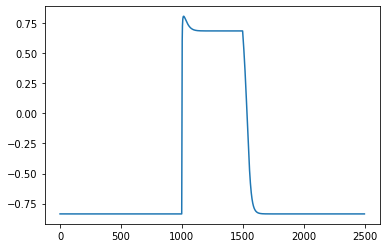

In [84]:
#Overlap
import scipy.stats
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)

0.09889657722223984
0.09889644546369537
0.0988963199239797
0.09889620031059831
0.09889608634475935
0.09889597776073539
0.0988958743052532
0.09889577573691333
0.09889568182563477
0.098895592352128
0.09889550710738958
0.09889542589222279
0.09889534851677889
0.09889527480012017
0.0988952045698042
0.0988951376614855
0.09889507391853786
0.09889501319169301
0.09889495533869583
0.09889490022397716
0.09889484771833991
0.09889479769866141
0.09889475004760845
0.09889470465336651
0.09889466140938118
0.09889462021411116
0.0988945809707943
0.09889454358722238
0.09889450797552864
0.09889447405198357
0.09889444173680065
0.09889441095395235
0.09889438163099254
0.09889435369888891
0.098894327091863
0.09889430174723678
0.09889427760528766
0.09889425460910911
0.09889423270447864
0.09889421183973175
0.09889419196564118
0.09889417303530335
0.09889415500402772
0.0988941378292338
0.09889412147035163
0.09889410588872669
0.0988940910475303
0.09889407691167372
0.0988940634477257
0.09889405062383504
0.0988940384

0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425
0.09889379437631425


0.10024362953062976
0.10024362955797798
0.10024362958396763
0.10024362960866628
0.10024362963213772
0.10024362965444338
0.10024362967564075
0.10024362969578529
0.10024362971492906
0.10024362973312183
0.10024362975041078
0.10024362976684079
0.10024362978245471
0.1002436297972929
0.10024362981139398
0.10024362982479447
0.10024362983752935
0.10024362984963155
0.10024362986113254
0.10024362987206216
0.10024362988244884
0.10024362989231951
0.10024362990169974
0.100243629910614
0.10024362991908546
0.10024362992713601
0.10024362993478665
0.10024362994205717
0.10024362994896653
0.10024362995553272
0.10024362996177251
0.10024362996770245
0.10024362997333773
0.10024362997869309
0.1002436299837824
0.10024362998861885
0.10024362999321502
0.1002436299975829
0.10024363000173364
0.10024363000567824
0.1002436300094269
0.10024363001298939
0.10024363001637474
0.10024363001959194
0.10024363002264929
0.10024363002555486
0.10024363002831602
0.10024363003093995
0.10024363003343353
0.10024363003580328
0.1002

0.09889379498369827
0.09889379495379991
0.09889379492537295
0.09889379489834516
0.0988937948726473
0.0988937948482142
0.09889379482498352
0.09889379480289627
0.09889379478189597
0.09889379476192943
0.09889379474294548
0.09889379472489569
0.0988937947077346
0.09889379469141801
0.09889379467590459
0.09889379466115475
0.09889379464713081
0.09889379463379723
0.09889379462112005
0.09889379460906682
0.09889379459760685
0.09889379458671099
0.0988937945763515
0.09889379456650206
0.0988937945571374
0.09889379454823374
0.09889379453976847
0.09889379453171976
0.09889379452406742
0.0988937945167917
0.09889379450987425
0.09889379450329737
0.09889379449704422
0.09889379449109895
0.09889379448544634
0.0988937944800721
0.0988937944749624
0.09889379447010428
0.09889379446548538
0.0988937944610939
0.09889379445691857
0.0988937944529489
0.09889379444917464
0.09889379444558626
0.09889379444217458
0.09889379443893084
0.09889379443584688
0.09889379443291474
0.09889379443012691
0.09889379442747641
0.09889379

0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426
0.09889379437631426


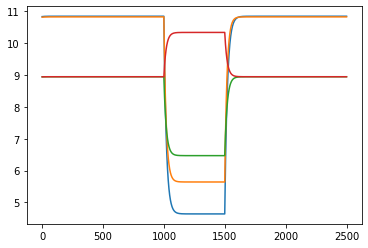

In [85]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0
m=np.zeros(t_max-t_p)
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    if t>t_p:
        q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
        M=1/N*np.sum(r[:,t]**2)
        q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
        M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
        R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
        m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
        print(m[t-t_p])
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
    R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
    print(m[t-t_p])
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
    R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
    print(m[t-t_p])
plt.figure()
for i in range(N):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])

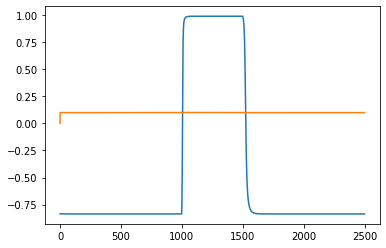

In [86]:
#Overlap
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.plot(range(0,t_max-t_p),m)